# GENIE3

In [1]:
from pathlib import Path
import sys
import os.path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

import json

from pymodulon.util import explained_variance
from pymodulon.imodulondb import imdb_gene_presence

%matplotlib inline
%config  InlineBackend.figure_format = 'png'

sns.set_style('whitegrid')

In [2]:
precise1k = load_json_model('../Data/p1k.json.gz')

## Principal Component Analysis

In [3]:
components_GENIE3 = pd.read_csv('./Results/GENIE3/genie3_top250_regulon_matrix.csv', index_col=0)

In [4]:
activities_GENIE3 = pd.read_csv('./Results/PCA/A_PCA.csv', index_col=0).T

In [5]:
components_GENIE3.columns = activities_GENIE3.index

In [6]:
activities_GENIE3

,p1k_00001,p1k_00002,p1k_00003,p1k_00004,p1k_00005,p1k_00006,p1k_00007,p1k_00008,p1k_00009,p1k_00010,...,p1k_01046,p1k_01047,p1k_01048,p1k_01049,p1k_01050,p1k_01051,p1k_01052,p1k_01053,p1k_01054,p1k_01055
Component_1,-0.000796,0.000796,-0.009932,-0.011762,-0.004834,-0.005275,-0.009730,-0.008994,-0.004250,-0.004251,...,-0.024665,-0.032701,-0.031739,-0.032275,-0.028228,-0.028110,-0.017707,-0.028397,-0.029349,-0.028413
Component_2,0.000340,-0.000340,0.032579,0.034095,0.003090,0.003045,0.032615,0.029976,0.005862,0.007157,...,-0.009067,0.019883,0.020178,0.020062,0.017391,0.018562,0.014461,0.067900,0.059982,0.057965
Component_3,0.000428,-0.000428,-0.025548,-0.028039,-0.003330,-0.002797,-0.024140,-0.024606,-0.007185,-0.007997,...,0.001653,-0.000951,-0.000218,-0.000471,-0.001364,-0.002057,-0.009706,-0.020753,-0.019695,-0.015142
Component_4,-0.000026,0.000026,-0.022460,-0.023100,0.006338,0.007627,-0.021889,-0.017520,0.005531,0.004391,...,0.046154,0.061455,0.064692,0.060869,0.068568,0.068627,0.024516,0.046473,0.066673,0.057466
Component_5,0.000122,-0.000122,0.020359,0.024101,-0.008346,-0.010845,0.024425,0.024194,0.001842,0.003221,...,-0.014840,-0.026451,-0.024957,-0.025923,-0.017571,-0.016351,0.011342,-0.002116,-0.001529,0.001051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Component_246,0.002403,-0.002403,-0.009581,0.007558,0.029961,0.045749,0.009189,0.026739,0.014043,-0.020146,...,0.010333,0.042124,0.026685,-0.078522,-0.010899,-0.022550,0.043597,0.038264,-0.026933,0.021084
Component_247,0.018227,-0.018227,-0.003811,-0.018609,0.016571,-0.009261,0.019573,0.004479,0.030027,0.039885,...,0.052473,-0.007073,0.032239,0.003937,-0.040311,-0.016154,0.030262,0.070465,0.041169,0.017018
Component_248,0.017610,-0.017610,-0.019091,-0.043341,-0.064804,-0.066699,0.074716,0.030099,0.033713,0.082203,...,-0.036537,-0.021847,0.097845,-0.112593,0.014330,0.026513,-0.014223,-0.022293,-0.028344,-0.006859
Component_249,0.016306,-0.016306,-0.049227,0.014516,-0.008886,-0.017670,-0.028651,-0.010584,0.020709,0.022158,...,-0.003203,-0.015069,-0.001256,0.045928,-0.027366,-0.041236,-0.046568,-0.080595,-0.083178,-0.080711


In [7]:
GENIE3 = IcaData(components_GENIE3,activities_GENIE3)

In [8]:
GENIE3.X = precise1k.X

In [9]:
GENIE3.gene_table = precise1k.gene_table
GENIE3.trn = precise1k.trn

In [10]:
GENIE3.cog_colors = precise1k.cog_colors

In [11]:
GENIE3.sample_table = precise1k.sample_table

  0%|          | 0/50 [00:00<?, ?it/s]

      F1 Score  Precision    Recall       MCC
2500  0.164929   0.417194  0.210719  0.175596
2550  0.165440   0.412354  0.214097  0.177146
2600  0.165778   0.408166  0.217513  0.178671
2650  0.166339   0.402533  0.221254  0.180165
2700  0.166936   0.399095  0.225161  0.182002
2750  0.167656   0.394183  0.229372  0.183712
2800  0.168774   0.390325  0.234692  0.186039
2850  0.169538   0.385418  0.240348  0.187972
2900  0.170588   0.380731  0.246979  0.190280
2950  0.171533   0.376286  0.252998  0.192360
3000  0.172633   0.372027  0.258134  0.194294
3050  0.173694   0.366217  0.263702  0.195926
3100  0.174298   0.360335  0.269628  0.197309
3150  0.175465   0.355912  0.275948  0.199397
3200  0.176272   0.348317  0.282679  0.200549
3250  0.177167   0.342330  0.288854  0.202046
3300  0.179129   0.338076  0.296764  0.204655
3350  0.180773   0.331630  0.305100  0.206575
3400  0.181998   0.325252  0.312704  0.208233
3450  0.182716   0.318689  0.312721  0.209228
3500  0.184112   0.309654  0.32637

3650

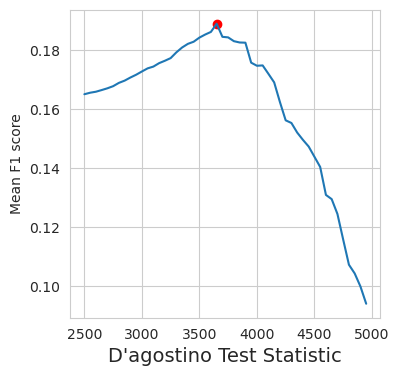

In [12]:
GENIE3.reoptimize_thresholds()

In [13]:
# GENIE3.recompute_thresholds(150)                                                 

In [14]:
imdb_gene_presence(GENIE3)[0].to_csv('Presence_Matrices/GENIE3_Gene_Presence_Matrix.csv')